In [89]:
import pandas as pd
import numpy
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.optimizers import SGD
import keras
from tensorflow.keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, SimpleRNN
from keras import regularizers
from tensorflow.keras.regularizers import l2




import math
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv('NFLX.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001
...,...
1004,427.140015
1005,457.130005
1006,429.480011
1007,405.600006


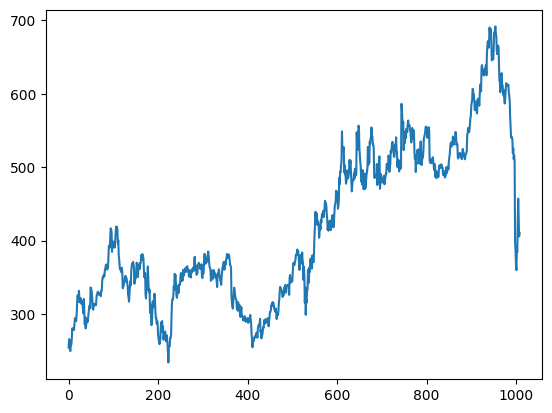

In [7]:
plt.plot(df1)

In [8]:
import numpy as np

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

### Train test split

In [11]:
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(706, 303)

In [13]:
train_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       [0.03542955],
       [0.03405342],
       [0.05257641],
       [0.05327534],
       [0.0701601 ],
       [0.10133021],
       [0.09750767],
       [0.09757319],
       [0.10301218],
       [0.09667768],
       [0.11369343],
       [0.13167034],
       [0.12391599],
       [0.12559796],
       [0.12343551],
       [0.14672022],
       [0.1771914 ],
       [0.19951508],
       [0.19064677],
       [0.18156003],
       [0.2131015 ],
       [0.19095254],
       [0.17911361],
       [0.19149862],
       [0.19049385],
       [0.18472731],
       [0.17387127],
       [0.18265218],
       [0.18042421],
       [0.15906164],
       [0.14647998],
       [0.18887749],
       [0.1459339 ],
       [0.11334393],
       [0.13426968],
       [0.10137394],
       [0.10875693],
       [0.12026823],
       [0.13125532],
       [0.12007165],
       [0.12243068],
       [0.14021101],
       [0.15244317],
       [0.16463161],
       [0.169

### Matrix of values

In [14]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

### Reshape

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape)

(605, 100)


In [17]:
print(y_train.shape)

(605,)


In [18]:
print(X_test.shape)

(202, 100)


In [19]:
print(ytest.shape)

(202,)


In [20]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### LSTM Model implementation


In [110]:
model=Sequential()

# model.add(LSTM(640,return_sequences=True,input_shape=(100,1)))
# model.add(LSTM(320,return_sequences=True))


model.add(LSTM(128, return_sequences=True , input_shape=(100,1), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False ,kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(320, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(264, activation='relu'))


model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(learning_rate = 0.0001))

In [111]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 320)                 │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 264)                 │          84,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             265 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221,777 (866.32 KB)

 Trainable params: 221,777 (866.32 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)


history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,shuffle = True, callbacks=[early_stopping],batch_size=64,verbose=1,)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 280ms/step - loss: 0.2852 - val_loss: 0.5859
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.2472 - val_loss: 0.4354
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - loss: 0.2044 - val_loss: 0.2405
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - loss: 0.1716 - val_loss: 0.1731
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - loss: 0.1681 - val_loss: 0.2059
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - loss: 0.1631 - val_loss: 0.2076
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - loss: 0.1590 - val_loss: 0.1840
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - loss: 0.1563 - val_loss: 0.1757


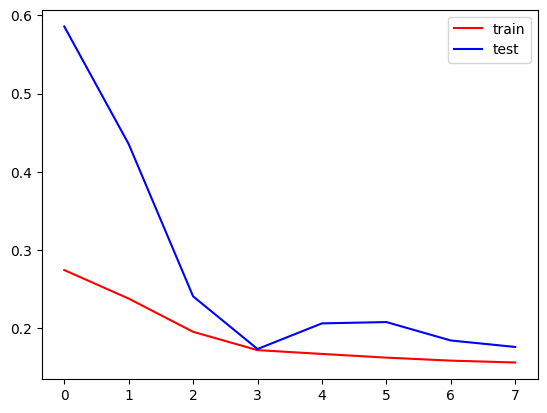

In [113]:
plt.plot(history.history['loss'] , color = 'red', label = 'train')
plt.plot(history.history['val_loss'] , color = 'blue', label = 'test')
plt.legend()
plt.show()

### Performance matrix

In [114]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [115]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [116]:
math.sqrt(mean_squared_error(y_train,train_predict))

392.26825751509904

In [117]:
math.sqrt(mean_squared_error(ytest,test_predict))

530.9322388005487

### Prediction plotting

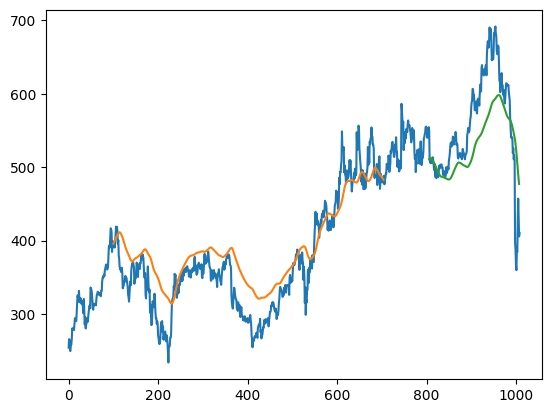

In [118]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [119]:
len(test_data)

303

In [120]:
x_input=test_data[203:].reshape(1,-1)
x_input.shape

(1, 100)

In [121]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [122]:
temp_input

[0.7623031220089325,
 0.770232186519946,
 0.7764574241046989,
 0.7460518342503559,
 0.741049807175792,
 0.779297134920363,
 0.7849981594001756,
 0.7830978186350088,
 0.7836438967059076,
 0.7644437065449226,
 0.797667144433283,
 0.8223062503372986,
 0.8284441613012656,
 0.8070377960750383,
 0.8757563085718285,
 0.8851269602135838,
 0.8692906961575151,
 0.8710599825542908,
 0.8587841584420446,
 0.8541971550699885,
 0.8647255577514177,
 0.8735501313222742,
 0.8615145487965392,
 0.8826586764115594,
 0.884908581408719,
 0.854634045922767,
 0.9158383843680022,
 0.9412202154248719,
 0.9562481616145222,
 0.9493895237067091,
 0.9371572940990189,
 0.9614687007370002,
 0.9969856403113886,
 0.9770209932746399,
 0.9694850896844873,
 0.9925732858122798,
 0.9491274149699269,
 0.8995870966094257,
 0.9121032955512327,
 0.9220200252638868,
 0.9021864325955293,
 0.9254931407712357,
 0.9801664073316425,
 0.9730019329394415,
 0.9906293483582447,
 1.0,
 0.9788777395352508,
 0.9718441840840797,
 0.9290317157

In [123]:
lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.5085391]
101
1 day input [0.77023219 0.77645742 0.74605183 0.74104981 0.77929713 0.78499816
 0.78309782 0.7836439  0.76444371 0.79766714 0.82230625 0.82844416
 0.8070378  0.87575631 0.88512696 0.8692907  0.87105998 0.85878416
 0.85419716 0.86472556 0.87355013 0.86151455 0.88265868 0.88490858
 0.85463405 0.91583838 0.94122022 0.95624816 0.94938952 0.93715729
 0.9614687  0.99698564 0.97702099 0.96948509 0.99257329 0.94912741
 0.8995871  0.9121033  0.92202003 0.90218643 0.92549314 0.98016641
 0.97300193 0.99062935 1.         0.97887774 0.97184418 0.92903172
 0.91780432 0.92704392 0.94309869 0.93916696 0.89124314 0.83853568
 0.83569596 0.804373   0.82743933 0.85559515 0.86105593 0.82374784
 0.82518942 0.80968086 0.79532991 0.81072929 0.78019265 0.77073453
 0.78604659 0.81046718 0.83082499 0.83049742 0.82837857 0.82311443
 0.82274301 0.8261288  0.80505013 0.79397565 0.78038929 0.72877398
 0.69769113 0.67097703 0.66833397 0.67049655 0.66258921 0.623228
 0.63740416 0.60487972 0.61593233 0.

In [124]:
day_new=np.arange(1,101)
day_pred=np.arange(101,108)

In [125]:
len(df1)

1009

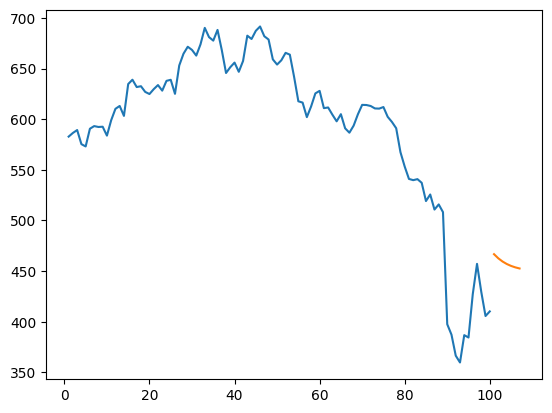

In [126]:
plt.plot(day_new,scaler.inverse_transform(df1[909:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

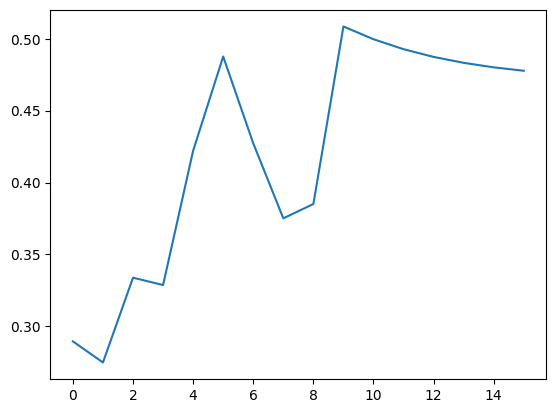

In [127]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [128]:
df3=scaler.inverse_transform(df3).tolist()

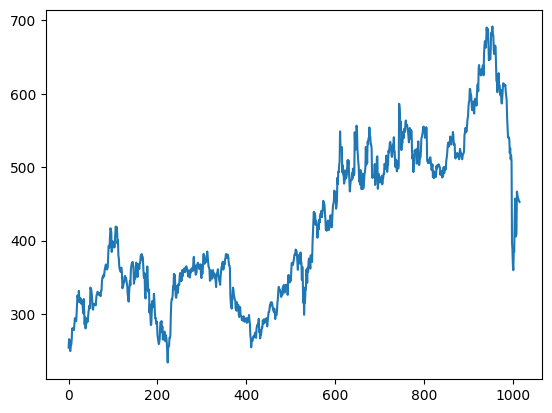

In [129]:
plt.plot(df3)